here mine imports

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/1991.csv')

In [10]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
df.shape

(5076925, 29)

**Q0.** Examine how many missing values there are in different columns of your dataset. Remove columns with totally missing values.

In [6]:
for column_name in df.columns:
    print(df[column_name].isnull().sum())

0
0
0
0
43505
0
56090
0
0
0
56090
0
56090
43505
0
0
26261
0
0


In [16]:
for column_name in df.columns:
    if df[column_name].isnull().sum() == df.shape[0]:
        print(column_name)

TailNum
AirTime
TaxiIn
TaxiOut
CancellationCode
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


In [4]:
df = df.dropna('columns', how='all')

C:\Users\User\AppData\Local\Temp\ipykernel_19060\102169749.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns', how='all')


In [20]:
df.shape # now only 19/29 are left

(5076925, 19)

**Q1.** Visualize the correlation matrix of the numeric features of your dataset. Find top-10 of the most correlated pairs of columns. Can you explain why are they highly correlated?

In [21]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_9896\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.006707,-0.001769,-0.003813,-0.001934,-0.002384,-0.001838,0.016787,0.001087,0.002217,-0.028631,-0.029289,0.010559,-0.031704,-0.006695
DayofMonth,NaN,0.006707,1.000000,0.005891,-0.002353,-0.001550,-0.001718,-0.001005,0.001378,0.000853,0.001193,-0.005526,-0.005544,0.001125,-0.011076,-0.000952
DayOfWeek,NaN,-0.001769,0.005891,1.000000,0.005262,0.003906,0.006740,0.006716,0.007402,0.009725,0.014204,0.006240,0.020536,0.014389,-0.006978,0.000521
DepTime,NaN,-0.003813,-0.002353,0.005262,1.000000,0.984100,0.793693,0.821491,0.016760,-0.046212,-0.043425,0.108290,0.128147,-0.050281,NaN,0.002173
CRSDepTime,NaN,-0.001934,-0.001550,0.003906,0.984100,1.000000,0.785386,0.819418,0.018151,-0.050496,-0.046813,0.077316,0.095680,-0.053210,-0.003737,-0.001116
ArrTime,NaN,-0.002384,-0.001718,0.006740,0.793693,0.785386,1.000000,0.944741,0.011021,0.058332,0.056374,0.070468,0.071552,0.046770,NaN,NaN
CRSArrTime,NaN,-0.001838,-0.001005,0.006716,0.821491,0.819418,0.944741,1.000000,0.009707,0.059340,0.061840,0.081904,0.095566,0.052129,-0.007040,0.000519
FlightNum,NaN,0.016787,0.001378,0.007402,0.016760,0.018151,0.011021,0.009707,1.000000,-0.166403,-0.169189,-0.016325,-0.024913,-0.172730,0.000292,-0.005367
ActualElapsedTime,NaN,0.001087,0.000853,0.009725,-0.046212,-0.050496,0.058332,0.059340,-0.166403,1.000000,0.984070,0.107073,0.057504,0.973699,NaN,NaN


C:\Users\User\AppData\Local\Temp\ipykernel_9896\2438265331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


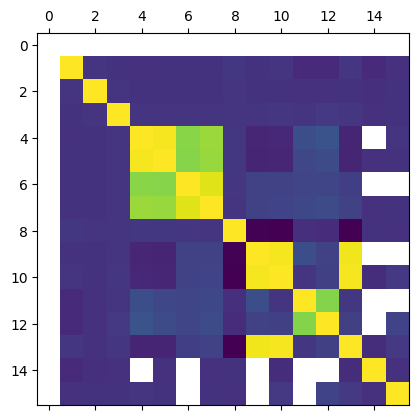

In [32]:
plt.matshow(df.corr())
plt.show()

First of all let's see the odds - Year has NaN correlation with all columns, this is cause the Year column has only one value (1991). So it is a constant, no correlation to the consant can be done. Furthermore, imagine training the model that only learns to say 1991.

The other nans have happened, due to the fact that columns are mutually exclusive. If your fly is cancelled, then when will you arrive? 
Technically the row with non cancelled have arrTime, also it seems Cancelled column too often takes 0 value

In [29]:
df['Cancelled'].sum()
df['Year']

43505

Below the code to get top 10 most correlated pairs, without square brackets it returns all pairs so i had to avoid correlation on itself (first 15, if you look at the matrix you notice Year is excluded). Also i had to avoid identical pairs but swapped(just step 2)

In [55]:
df.corr().abs().unstack().sort_values(ascending=False)[15:35:2]

C:\Users\User\AppData\Local\Temp\ipykernel_9896\1098466335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs().unstack().sort_values(ascending=False)[15:35:2]


CRSElapsedTime  Distance             0.985106
CRSDepTime      DepTime              0.984100
CRSElapsedTime  ActualElapsedTime    0.984070
Distance        ActualElapsedTime    0.973699
CRSArrTime      ArrTime              0.944741
DepTime         CRSArrTime           0.821491
CRSArrTime      CRSDepTime           0.819418
ArrTime         DepTime              0.793693
CRSDepTime      ArrTime              0.785386
DepDelay        ArrDelay             0.783604
dtype: float64

In [57]:
descriptions = pd.read_csv("./data/variable-descriptions.csv")
descriptions

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


Now let's discuss why they have such correlation:
1. CRSElapsedTime  Distance  - scheduled epalsed time is highly correlated with the distance, as it is the easiest to measure value, assuming velocity is the same during the fly - distance will be the multiple of the time (D = U*t)
2. CRSDepTime      DepTime - scheduled dep Time is assumed to predict real DepTime, so having high correlation is expected. However, sometimes unexpected situations may happen.
3. CRSElapsedTime  ActualElapsedTime  
Scheduled elapsed time is also assumed to predict real elapsed time, so having high correlation is expected. However, sometimes unexpected situations may happen.
4. Distance        ActualElapsedTime 
Distance is higly correleted with scheduled Elapsedtime, which is highly correleted to Actual elapsedtime. Also at the same velocity achiving different distane is possible only with rising time at 2022.
5. CRSArrTime      ArrTime    
Scheduled arrival time is also assumed to predict real arrival time, so having high correlation is expected. However, sometimes unexpected situations may happen.
6. DepTime         CRSArrTime  
DepTime is highly correleted with CRSDepTime, that is very correleted with CRSArrTime (likely is a part of the formula of calculation of the expected arrival time).
7. CRSArrTime      CRSDepTime  
All scheduled(calculated) values in the airport are likely to be dependent (by being joined during calculation of other parameters)
ArrTime is likely to be a sum of Dep time, flying time and ending time,the same way for our expectations that would be scheduled
8. ArrTime         DepTime 
ArrTime includes DepTime, cuz there is no time travel and time is assumed to be linear with positive trend
9. CRSDepTime      ArrTime   
Dep Time is highly correleted with both ArrTime and Scheduled Dep time, since one first uses value of dep time to get its value and second is trying to predict Dep time
10. DepDelay        ArrDelay
Real Dep Time is highly correleted with DepDelay, i assume they use the formula RealDepTime = DepDelay + CRSDepTime
The same way i assume for ArrDelay, ArrTime = ArrDelay + CRSArrTime
As we know ArrTIme is dependent on DepTime

Conclusion:
The results based on top 10 highly correleted pairs, didn't provide us any reasonable information (that wouldn't be expected/obvious). 


**Q2.** Plot a graph of the number of cancelled flights by carrier (also provide human-readable carriers' names). Which company cancelled races most often?

In [5]:
df['UniqueCarrier']

0          US
1          US
2          US
3          US
4          US
           ..
5076920    CO
5076921    CO
5076922    CO
5076923    CO
5076924    CO
Name: UniqueCarrier, Length: 5076925, dtype: object

UniqueCarrier
AA        AxesSubplot(0.125,0.11;0.775x0.77)
AS        AxesSubplot(0.125,0.11;0.775x0.77)
CO        AxesSubplot(0.125,0.11;0.775x0.77)
DL        AxesSubplot(0.125,0.11;0.775x0.77)
HP        AxesSubplot(0.125,0.11;0.775x0.77)
ML (1)    AxesSubplot(0.125,0.11;0.775x0.77)
NW        AxesSubplot(0.125,0.11;0.775x0.77)
PA (1)    AxesSubplot(0.125,0.11;0.775x0.77)
TW        AxesSubplot(0.125,0.11;0.775x0.77)
UA        AxesSubplot(0.125,0.11;0.775x0.77)
US        AxesSubplot(0.125,0.11;0.775x0.77)
WN        AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

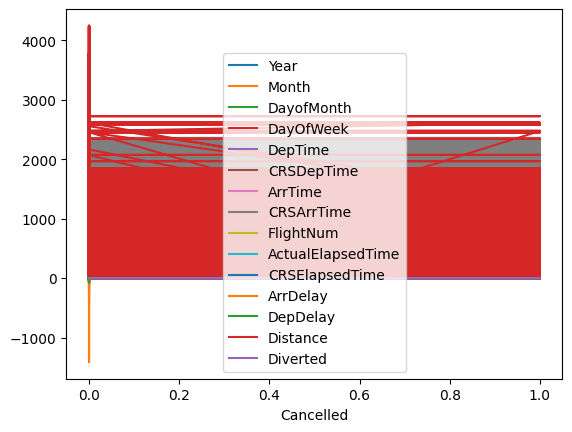

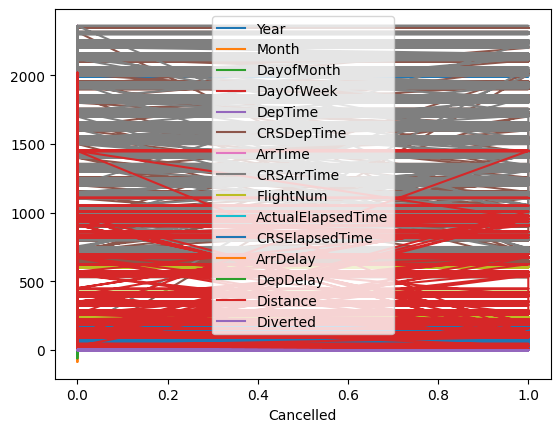

In [8]:
df.groupby('UniqueCarrier').plot('Cancelled')

**Q3.** Select all flights of the most popular carrier scheduled on 1st day of a month. Print top-10 of such flights with greatest arrival delays.

**Q4.** Create column `DepDatetime` with datetimes of departures in the format `yyyy-mm-dd HH:MM`.

**Q5.** Plot the histograms of arrival and departure delays. Adjust figure size, number of bins and type of scales.

**Q6.** Plot boxplots of arrival delays, grouped by 
* month
* day of week
* hour
* carrier

Answer question 1 from the coursework project file.

**Q7.** Add column with ages of planes. Do older planes suffer more delays? Plot some graphs justifying your answer.